## Simulação Dinâmica de Motocicleta

Este notebook implementa a simulação do movimento longitudinal de uma motocicleta por meio da resolução de uma **equação diferencial ordinária (EDO)**. O modelo considera os principais elementos físicos envolvidos na propulsão, na resistência ao movimento e na interação com a pista.

Neste exercício, o estudante:

- Visualiza a forma matemática da EDO que descreve o fenômeno físico;
- Executa a simulação com **parâmetros padrão** da motocicleta e do ambiente (massa, potência, atrito, inclinação, etc.);
- Em seguida, **modifica um ou mais parâmetros** do sistema (como potência do motor, massa do conjunto ou coeficientes aerodinâmicos);
- Compara graficamente os resultados, analisando o efeito da alteração no comportamento dinâmico da motocicleta — por exemplo, em termos de aceleração, tempo de resposta ou velocidade final.

Este tipo de simulação permite compreender, de forma interativa, como cada componente físico afeta o desempenho do sistema, integrando conceitos de **mecânica, termodinâmica e dinâmica veicular**.


### Equações do Sistema

A equação diferencial que rege o movimento longitudinal da motocicleta é:

$$
\begin{aligned}
\frac{dV}{dt} &= \alpha \frac{ P_{max}}{m\,V} - \beta \mu g \cos(\theta) - \rho C_{D} A_{f}  \frac{V^2 }{m} - C_{R} g \cos(\theta) - g \sin(\theta)
\end{aligned}
$$

$$
\begin{aligned}
\\ \\ \\ onde: & \\
\\
t \quad &\text{: tempo, em s} \\
x \quad &\text{: posição, em m} \\
V \quad &\text{: velocidade, em m/s} \\
m \quad &\text{: massa do conjunto motocicleta/piloto, em kg} \\
P_{\text{max}} \quad &\text{: potência máxima do motor, em W} \\
\mu \quad &\text{: coeficiente de atrito entre a pista e o pneu} \\
\theta \quad &\text{: inclinação da pista, em rad} \\
\rho \quad &\text{: massa específica do ar, em kg/m³} \\
A_f \quad &\text{: área frontal do conjunto motocicleta/piloto, em m²} \\
C_R \quad &\text{: coeficiente de resistência à rolagem} \\
C_D \quad &\text{: coeficiente de arrasto aerodinâmico} \\
\alpha \quad &\text{: percentual do uso do motor, no intervalo [0–1]} \\
\beta \quad &\text{: percentual do uso da força de atrito disponível, no intervalo [0–1]} \\
\end{aligned}
$$



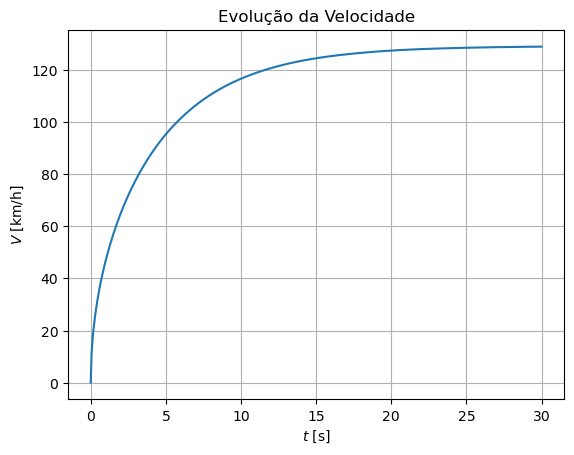

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
alpha = 1.0
P_max = 22080
m = 250
beta = 0
mu = 0.8
g = 9.81
theta = 0
rho = 1.225
C_D = 0.6
A_f = 0.6
C_R = 0.02
V0 = 0.01
t0 = 0
tf = 30

# Equação diferencial
def dVdt(t, V):
    return alpha*P_max/(m*V) - beta*mu*g* np.cos(theta) - rho*C_D*A_f/m* V**2 - C_R*g*np.cos(theta) - g*np.sin(theta)

# Solver EDO
sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=np.linspace(t0, tf, 500))

# Plotar
plt.plot(sol.t, sol.y[0] * 3.6)  # Conversão de m/s para km/h 
plt.xlabel('$t$ [s]')
plt.ylabel('$V$ [km/h]')
plt.title('Evolução da Velocidade')
plt.grid()
plt.show()

## Análise do Modelo e Exploração

O gráfico acima mostra a evolução da velocidade de uma motocicleta ao longo do tempo, considerando os parâmetros padrão definidos no início do notebook. Com a potência máxima do motor ajustada para **22080 W**, observa-se que a motocicleta acelera rapidamente nos primeiros segundos e se aproxima de uma **velocidade de equilíbrio** próxima de 130 km/h.

Esse comportamento é consistente com o modelo físico: a aceleração é inicialmente alta, pois a força de propulsão é dominante. Com o aumento da velocidade, o efeito das forças dissipativas - como o arrasto aerodinâmico e a resistência à rolagem - cresce, até equilibrar a propulsão e impedir novo aumento de velocidade.

---

## Explorando diferentes cenários

Na célula abaixo, você pode alterar o valor de um dos parâmetros do modelo (como a potência do motor, a massa da motocicleta, o coeficiente de arrasto, etc.) e observar como isso afeta a dinâmica do sistema.

Para isso, por exemplo:

1. Altere o valor da variável `P_max` logo no início da célula (exemplo, P_max=13000);
2. Depois, modifique o texto da legenda (`legenda_mod`), para que o texto correto apareça no gráfico;

Depois, a a equação diferencial será resolvida mais uma vez, mas agora com o novo parâmetro. Finalmente, o novo gráfico será desenhado **junto com a curva base anterior**, permitindo uma comparação visual imediata. Essa comparação direta é uma das principais vantagens do uso de notebooks interativos: você pode **experimentar, testar hipóteses e visualizar os efeitos** de forma rápida e clara, sem necessidade de reescrever o código completo ou de interpretar saídas numéricas isoladas.


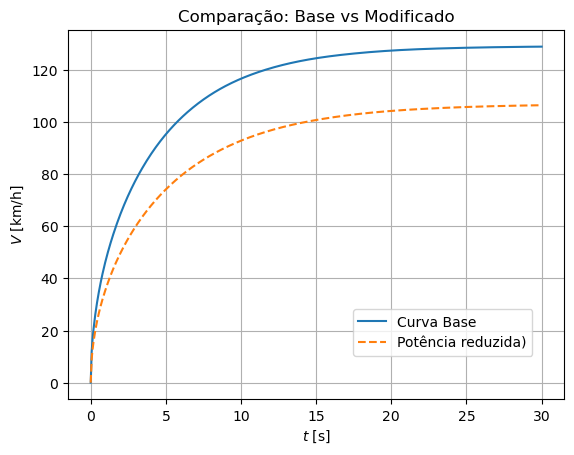

In [8]:
# ATENÇÃO: certifique-se de ter rodado a célula anterior antes desta, pois os parâmetros da motocicleta estão lá
# Variação do parâmetro
P_max = 13000  # Parâmetro variado
legenda_mod = f'Potência reduzida)'  # legenda associada

# A EDO é resolvida novamente, com o novo valor para o parâmetro
sol_mod = solve_ivp(dVdt, (t0, tf), [V0], t_eval=np.linspace(t0, tf, 500))

# Plot comparativo
plt.plot(sol.t, sol.y[0]*3.6, label='Curva Base')
plt.plot(sol_mod.t, sol_mod.y[0]*3.6, '--', label=legenda_mod)
plt.xlabel('$t$ [s]')
plt.ylabel('$V$ [km/h]')
plt.title('Comparação: Base vs Modificado')
plt.grid()
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.10)) # Posição da legenda
plt.show()


## Conclusão

Este experimento computacional ilustra como o uso de modelos diferenciais permite compreender, de maneira quantitativa, o comportamento dinâmico de sistemas físicos complexos como uma motocicleta em movimento. Ao integrar os efeitos de propulsão, resistência aerodinâmica, atrito com a pista e inclinação do terreno, o modelo oferece uma visão sintética e controlável de fenômenos reais.

Mais do que simplesmente resolver uma equação, o estudante é levado a explorar como diferentes parâmetros influenciam a resposta do sistema — algo que, em engenharia, representa a transição entre entender os fenômenos e ser capaz de projetar soluções.

Além disso, este notebook exemplifica o poder didático das ferramentas interativas baseadas em Jupyter. Diferente de uma apostila impressa, que apresenta conteúdo estático, ou de um programa computacional tradicional, que exige preparo e interpretação externa, o notebook reúne em um mesmo ambiente:

- **Texto explicativo** com boa formatação matemática (via Markdown e LaTeX),
- **Código executável** com simulações em tempo real,
- **Visualizações gráficas** que mudam conforme os dados,
- E espaço aberto para o aluno **experimentar, errar e modificar** com facilidade.

Essa convergência transforma o aprendizado em uma atividade ativa e exploratória — mais próxima da prática da engenharia e do raciocínio científico. O notebook, portanto, não é apenas uma ferramenta técnica, mas um **ambiente de aprendizagem** que favorece a curiosidade, a autonomia e a construção sólida do conhecimento.

